In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix  

plt.rcParams["figure.figsize"] = (20,3)

In [8]:
def plot_confusion_matrix(oModel, mTrain_data, mTest_data, vTrainLabel, vTestLabel):
    vTrainHatY = oModel.predict(mTrain_data) #-- predict train set
    vTestHatY  = oModel.predict(mTest_data)  #-- predict test set

    #-- Compute confusion matrices:
    mTrainConfusion = confusion_matrix(vTrainLabel, vTrainHatY)
    mTestConfusion  = confusion_matrix(vTestLabel,  vTestHatY)

    _, ax = plt.subplots(1, 2, figsize=(16,7))
    nof_labels = len(np.unique(vTrainLabel))
    ConfusionMatrixDisplay(mTrainConfusion, display_labels=range(nof_labels)).plot(values_format='g', ax=ax[0])
    ConfusionMatrixDisplay(mTestConfusion,  display_labels=range(nof_labels)).plot(values_format='g', ax=ax[1])

    ax[0].set_title ('Train accuracy:' f'{np.mean(vY_train == vTrainHatY)}')
    ax[1].set_title ('Test accuracy: ' f'{np.mean(vY_test  == vTestHatY)}')
    plt.tight_layout()
    plt.show        ()

In [9]:

dData = loadmat('data/TIMIT_Train.mat')

In [10]:
mX = dData['mX']
vY = dData['vY'].squeeze()

# EDA

Checking the distribution of the samples

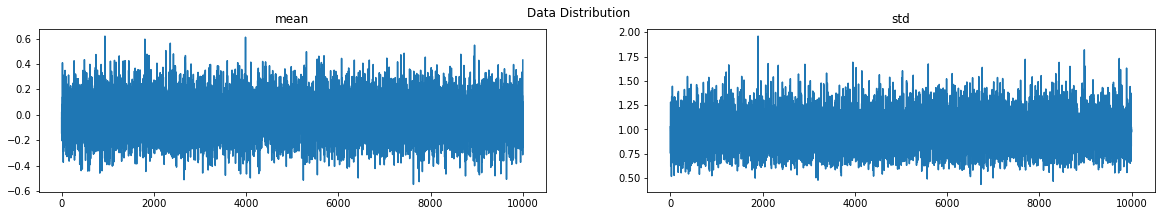

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Data Distribution')
ax1.set_title("mean")
ax1.plot(mX.mean(axis = 1))
ax2.set_title("std")
ax2.plot(mX.std(axis = 1))


It seemd that the data is already normalized

In [11]:
# Splitting the data to train and test

mX_train, mX_test, vY_train, vY_test = train_test_split(mX, vY, test_size=0.2, random_state=42)

In [7]:
# Training the data using SVC

from sklearn.svm import SVC

dRes = pd.DataFrame(columns=['C', 'Accuracy'])

# check using cross_val_predict for logartithmic values between 1 and 100

for C in np.logspace(0, 2, 10):
    y_pred                = cross_val_predict(SVC(C=C, kernel='linear'), mX_train, vY_train)
    accuracy = accuracy_score(vY_train, y_pred)
    dRes.loc[len(dRes)] = [C, accuracy]
    print(dRes.loc[len(dRes) - 1])
   

dRes.sort_values(by='C', ascending=False)

C           1.000000
Accuracy    0.866125
Name: 0, dtype: float64
C           1.668101
Accuracy    0.866125
Name: 1, dtype: float64
C           2.782559
Accuracy    0.866500
Name: 2, dtype: float64
C           4.641589
Accuracy    0.866250
Name: 3, dtype: float64
C           7.742637
Accuracy    0.866375
Name: 4, dtype: float64
C           12.915497
Accuracy     0.866125
Name: 5, dtype: float64
C           21.544347
Accuracy     0.866250
Name: 6, dtype: float64
C           35.938137
Accuracy     0.866250
Name: 7, dtype: float64
C           59.948425
Accuracy     0.866250
Name: 8, dtype: float64
C           100.000000
Accuracy      0.866375
Name: 9, dtype: float64


,C,Accuracy
9,100.000000,0.866375
8,59.948425,0.866250
7,35.938137,0.866250
6,21.544347,0.866250
5,12.915497,0.866125
4,7.742637,0.866375
3,4.641589,0.866250
2,2.782559,0.866500
1,1.668101,0.866125
0,1.000000,0.866125


In [5]:
# from the above table we conclude that C = 7.74 is the best classifier
from sklearn.svm import SVC

C = dRes.sort_values(by='C', ascending=False).iloc[0].C
oSvmClassifier = SVC(C=C, kernel='linear').fit(mX_train, vY_train) #0.884

NameError: name 'dRes' is not defined

In [12]:
C = 200
oSvmClassifier = SVC(C=C, kernel='linear').fit(mX_train, vY_train) #0.884

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plot_confusion_matrix(oSvmClassifier, mX_train, mX_test, vY_train, vY_test)

NameError: name 'oSvmClassifier' is not defined

In [10]:

#SvmClassifier = SVC(C=4, kernel='linear').fit(mX_train, vY_train) # 0.852
#oSvmClassifier = SVC(kernel = 'rbf', C = 4, gamma = 0.01, probability=True).fit(mX_train, vY_train) #0.884


In [11]:
#oSvmClassifier.score(mX_test, vY_test)

In [12]:
#oSvmClassifier = SVC(C = 1, kernel = 'linear')


In [13]:
#oSvmClassifier.fit(mX_train, vY_train)

In [14]:
# Train the data using the Knn

from sklearn.neighbors import KNeighborsClassifier

dRes = pd.DataFrame(columns=['K', 'Accuracy'])

# check using cross_val_predict for logartithmic values between 1 and 100

for K in np.linspace(1, 50, 10,  dtype = int):
    y_pred                = cross_val_predict(KNeighborsClassifier(n_neighbors=K), mX_train, vY_train)
    accuracy = accuracy_score(vY_train, y_pred)
    dRes.loc[len(dRes)] = [K, accuracy]
    print(dRes.loc[len(dRes) - 1])
   

dRes.sort_values(by='K', ascending=False)


K           1.0000
Accuracy    0.8075
Name: 0, dtype: float64
K           6.00000
Accuracy    0.83725
Name: 1, dtype: float64
K           11.000000
Accuracy     0.822375
Name: 2, dtype: float64
K           17.000000
Accuracy     0.822125
Name: 3, dtype: float64
K           22.000
Accuracy     0.829
Name: 4, dtype: float64
K           28.000000
Accuracy     0.827375
Name: 5, dtype: float64
K           33.000
Accuracy     0.819
Name: 6, dtype: float64
K           39.00000
Accuracy     0.81725
Name: 7, dtype: float64
K           44.00000
Accuracy     0.81925
Name: 8, dtype: float64
K           50.00000
Accuracy     0.81975
Name: 9, dtype: float64


,K,Accuracy
9,50.0,0.819750
8,44.0,0.819250
7,39.0,0.817250
6,33.0,0.819000
5,28.0,0.827375
4,22.0,0.829000
3,17.0,0.822125
2,11.0,0.822375
1,6.0,0.837250
0,1.0,0.807500


In [15]:
# from the above table we conclude that K = 6 is the best classifier

from sklearn.neighbors import KNeighborsClassifier

K = (int) (dRes.sort_values(by='K', ascending=False).iloc[0].K)
oKnnClassifier = KNeighborsClassifier(n_neighbors=K).fit(mX_train, vY_train) # 0.8505

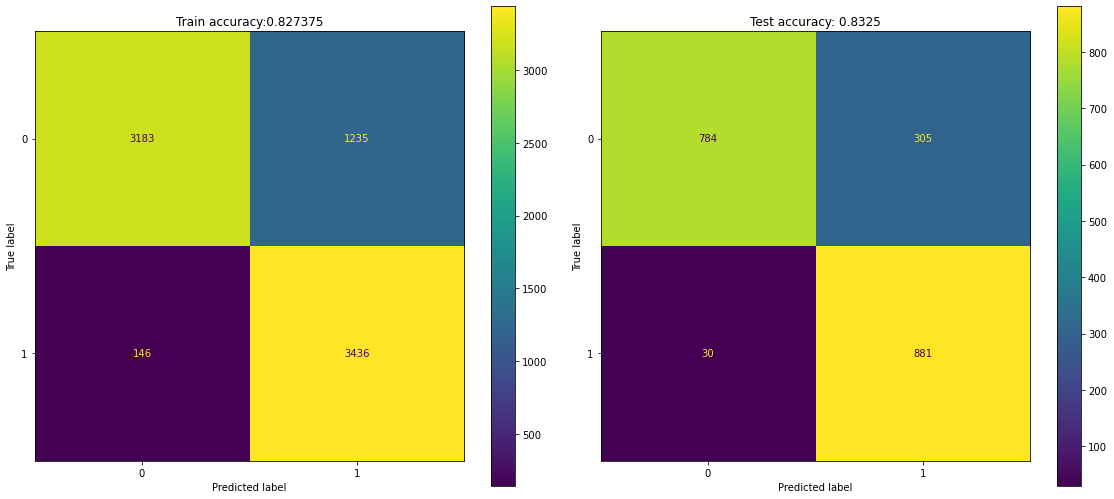

In [16]:

plot_confusion_matrix(oKnnClassifier, mX_train, mX_test, vY_train, vY_test)

In [17]:
oKnnClassifier.score(mX_test, vY_test)

0.8325

# Using Grid Search


SVM
(https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/)

In [18]:
from sklearn.model_selection import GridSearchCV

svm_param_grid = {'C': np.logspace(0, 2, 10), 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
# svm_param_grid = {'C': np.logspace(0, 2, 1), 'gamma': [1],'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(),svm_param_grid,refit=True,verbose=2, cv=10)
svm_grid.fit(mX_train,vY_train)


D .....C=59.94842503189409, gamma=0.1, kernel=sigmoid; total time=   1.6s
[CV] END .....C=59.94842503189409, gamma=0.1, kernel=sigmoid; total time=   1.6s
[CV] END .....C=59.94842503189409, gamma=0.1, kernel=sigmoid; total time=   1.9s
[CV] END .....C=59.94842503189409, gamma=0.1, kernel=sigmoid; total time=   1.8s
[CV] END .....C=59.94842503189409, gamma=0.1, kernel=sigmoid; total time=   1.6s
[CV] END .....C=59.94842503189409, gamma=0.1, kernel=sigmoid; total time=   1.6s
[CV] END .....C=59.94842503189409, gamma=0.1, kernel=sigmoid; total time=   1.6s
[CV] END .....C=59.94842503189409, gamma=0.01, kernel=linear; total time= 1.4min
[CV] END .....C=59.94842503189409, gamma=0.01, kernel=linear; total time= 1.4min
[CV] END .....C=59.94842503189409, gamma=0.01, kernel=linear; total time= 1.4min
[CV] END .....C=59.94842503189409, gamma=0.01, kernel=linear; total time= 1.4min
[CV] END .....C=59.94842503189409, gamma=0.01, kernel=linear; total time= 1.4min
[CV] END .....C=59.94842503189409, 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ]),
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

SVC(C=2.7825594022071245, gamma=0.01)


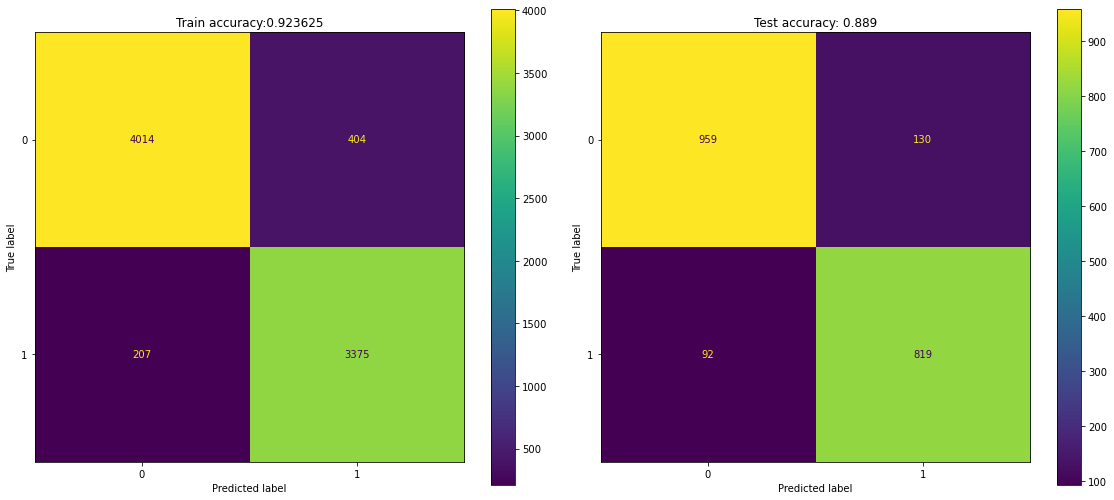

In [19]:
print(svm_grid.best_estimator_)
plot_confusion_matrix(svm_grid, mX_train, mX_test, vY_train, vY_test)

https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

In [20]:
knn_param_grid = {'leaf_size': list(range(1,5)), 'n_neighbors': np.linspace(1, 50, 10,  dtype = int),'p': [1,2]}
#knn_param_grid = {'n_neighbors': np.linspace(1, 50, 2,  dtype = int),'p': [1,2]}
knn_grid = GridSearchCV(KNeighborsClassifier(),knn_param_grid,refit=True,verbose=2, cv=10)
knn_grid.fit(mX_train,vY_train)


D ...................leaf_size=3, n_neighbors=39, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=39, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=39, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=39, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=39, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=39, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=39, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=44, p=1; total time=   0.2s
[CV] END ...................leaf_size=3, n_neighbors=44, p=1; total time=   0.2s
[CV] END ...................leaf_size=3, n_neighbors=44, p=1; total time=   0.2s
[CV] END ...................leaf_size=3, n_neighbors=44, p=1; total time=   0.2s
[CV] END ...................leaf_size=3, n_neighbors=44, p=1; total time=   0.2s
[CV] END ...................leaf_si

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4],
                         'n_neighbors': array([ 1,  6, 11, 17, 22, 28, 33, 39, 44, 50]),
                         'p': [1, 2]},
             verbose=2)

KNeighborsClassifier(leaf_size=1, n_neighbors=6, p=1)


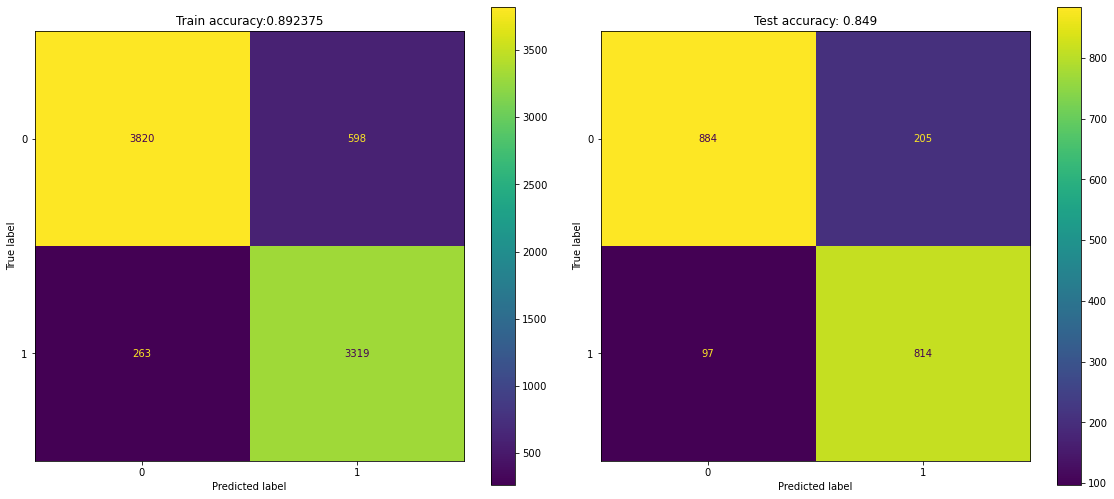

In [21]:
print(knn_grid.best_estimator_)
plot_confusion_matrix(knn_grid, mX_train, mX_test, vY_train, vY_test)

# Conclusion

It seems that the svm SVC(C=1, gamma=0.01) clssifier got the best results (0.88)

SVC(C=1, kernel='linear'): 0.85   
NeighborsClassifier(n_neighbors=6): 0.85

Using GridSearchCV:

SVC(kernel = 'rbf', C = 4, gamma = 0.01, probability=True): 0.88

KNeighborsClassifier(leaf_size=1, n_neighbors=6, p=1): 0.85




In [23]:
oSvmClassifier

SVC(C=100.0, kernel='linear')

In [27]:
oKnnClassifier

KNeighborsClassifier(n_neighbors=50)